In [2]:
from io import BytesIO
from garmin_fit_sdk import Decoder, Stream
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [146]:
polar = pd.read_excel('/Users/jonhlo/Desktop/delta/Delta pilot 1 og 2.xlsx', header = 2)

In [43]:

dagur1Act = pd.read_excel('/Users/jonhlo/Desktop/delta/Device_DELTA_118_20231121_142432_libactivities.xlsx')
dagur2Act = pd.read_excel('/Users/jonhlo/Desktop/delta/Device_DELTA_118_20231122_091631_libactivities.xlsx')
dagur1hr = pd.read_excel('/Users/jonhlo/Desktop/delta/Device_DELTA_118_20231121_142432_libhr.xlsx')


In [143]:
dagur2Act

,Unnamed: 0,Device,Session_datetime,Session,time,walk_steps,run_steps,other_steps,walk_distance,run_distance,total_distance,kcal_energy_expenditure,met_energy_expenditure,cadence,speed,activity,is_valid
0,0,LIR.870.35,2023-11-22 09:16:31+01:00,20231122_091631,17:33:02:2,0,0,0,0,0,0,0,112,0.0,0.0,other,1
1,1,LIR.870.35,2023-11-22 09:16:31+01:00,20231122_091631,17:33:02:40,0,0,0,0,0,0,0,114,0.0,0.0,other,1
2,2,LIR.870.35,2023-11-22 09:16:31+01:00,20231122_091631,17:33:02:80,0,0,0,0,0,0,0,119,0.0,0.0,other,1
3,3,LIR.870.35,2023-11-22 09:16:31+01:00,20231122_091631,17:33:02:121,0,0,0,0,0,0,0,127,0.0,0.0,other,1
4,4,LIR.870.35,2023-11-22 09:16:31+01:00,20231122_091631,17:33:02:161,0,0,0,0,0,0,0,134,0.0,0.0,other,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683345,683345,LIR.870.35,2023-11-22 09:16:31+01:00,20231122_091631,01:09:09:802,1496,524,3912,1045,516,1561,764,112,0.0,0.0,rest,1
683346,683346,LIR.870.35,2023-11-22 09:16:31+01:00,20231122_091631,01:09:09:842,1496,524,3912,1045,516,1561,764,112,0.0,0.0,rest,1
683347,683347,LIR.870.35,2023-11-22 09:16:31+01:00,20231122_091631,01:09:09:882,1496,524,3912,1045,516,1561,764,112,0.0,0.0,rest,1
683348,683348,LIR.870.35,2023-11-22 09:16:31+01:00,20231122_091631,01:09:09:922,1496,524,3912,1045,516,1561,764,112,0.0,0.0,rest,1


In [144]:
d1Act = dagur1Act.loc[:,['time','walk_steps','run_steps','other_steps','walk_distance','run_distance','total_distance','kcal_energy_expenditure','met_energy_expenditure','cadence','speed','activity','is_valid']]
d2Act = dagur2Act.loc[:,['time','walk_steps','run_steps','other_steps','walk_distance','run_distance','total_distance','kcal_energy_expenditure','met_energy_expenditure','cadence','speed','activity','is_valid']]
import datetime
import time
def time2secs(time):
    times = time.split(':')
    if times[0] == '00':
        times[0] = '24'
    elif times[0] == '01':
        times[0] = '25'
    secs = int(times[0])*60*60+int(times[1])*60+int(times[2])+int(times[3])/(1000)
    return np.floor(secs)
#datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()
d1Act.time = d1Act.time.apply(time2secs)
d2Act.time = d2Act.time.apply(time2secs)

In [102]:

d1hr = dagur1hr.loc[:,['time_hr','hr']]
d1hr['sec_hr'] = np.floor(d1hr.time_hr)

In [108]:
1700641291-d1hr['sec_hr'][0]

8139.0

In [147]:
d2polar = polar.loc[:,['Time','HR (bpm).1']]
d2polar.dropna()
d2polar.index = d1polar.index+8139
d2polar

,Time,HR (bpm).1
16278,00:00:00,NaN
16279,00:00:01,NaN
16280,00:00:02,NaN
16281,00:00:03,NaN
16282,00:00:04,NaN
...,...,...
43358,07:31:20,52.0
43359,07:31:21,52.0
43360,07:31:22,52.0
43361,07:31:23,52.0


In [124]:
d1 = d1hr.join(d1Act,how = 'outer',rsuffix = 'act')
d1 = d1.dropna(how = 'all')
d1 = d1.groupby('sec_hr').first()
d1.index = a.index-a.index[0]
d1

d1polar = polar.loc[:,['Time','HR (bpm)']]
d1polar.dropna()
d1polar.index = d1polar.index+8139


d1 = d1polar.join(d1,how = 'outer')
d1 = d1.drop(columns = ['Time','time_hr'])
d1 = d1.dropna(how = 'all')
d1

,HR (bpm),hr,walk_steps,run_steps,other_steps,walk_distance,run_distance,total_distance,kcal_energy_expenditure,met_energy_expenditure,cadence,speed,activity,is_valid
0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,112.0,0.0,0.0,other,1.0
1.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,166.0,0.0,0.0,other,1.0
2.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,149.0,0.0,0.0,other,1.0
3.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128.0,0.0,0.0,other,1.0
4.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,121.0,0.0,0.0,other,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17001.0,NaN,NaN,2905.0,10793.0,2468.0,2131.0,14927.0,17058.0,1684.0,115.0,0.0,0.0,other,1.0
17002.0,NaN,NaN,2905.0,10793.0,2468.0,2131.0,14927.0,17058.0,1684.0,115.0,0.0,0.0,other,1.0
17003.0,NaN,NaN,2905.0,10793.0,2468.0,2131.0,14927.0,17058.0,1684.0,119.0,0.0,0.0,other,1.0
17004.0,NaN,NaN,2905.0,10793.0,2468.0,2131.0,14927.0,17058.0,1684.0,115.0,0.0,0.0,other,1.0


In [127]:
d1.to_excel("dagur1.xlsx")

In [134]:
d2Act

,time,walk_steps,run_steps,other_steps,walk_distance,run_distance,total_distance,kcal_energy_expenditure,met_energy_expenditure,cadence,speed,activity,is_valid
0,63182.0,0,0,0,0,0,0,0,112,0.0,0.0,other,1
1,63182.0,0,0,0,0,0,0,0,114,0.0,0.0,other,1
2,63182.0,0,0,0,0,0,0,0,119,0.0,0.0,other,1
3,63182.0,0,0,0,0,0,0,0,127,0.0,0.0,other,1
4,63182.0,0,0,0,0,0,0,0,134,0.0,0.0,other,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
683345,4149.0,1496,524,3912,1045,516,1561,764,112,0.0,0.0,rest,1
683346,4149.0,1496,524,3912,1045,516,1561,764,112,0.0,0.0,rest,1
683347,4149.0,1496,524,3912,1045,516,1561,764,112,0.0,0.0,rest,1
683348,4149.0,1496,524,3912,1045,516,1561,764,112,0.0,0.0,rest,1


In [165]:
d2 = d2Act
d2 = d2.dropna(how = 'all')
d2 = d2.groupby('time').first()
d2.index = d2.index-d2.index[0]
d2

d2polar = polar.loc[:,['Time','HR (bpm).1']]
d2polar.dropna()
d2polar.index = d2polar.index+300

d2 = d2polar.join(d2,how = 'outer')
d2 = d2.drop(columns = ['Time'])
d2 = d2.dropna(how = 'all')
d2

,HR (bpm).1,walk_steps,run_steps,other_steps,walk_distance,run_distance,total_distance,kcal_energy_expenditure,met_energy_expenditure,cadence,speed,activity,is_valid
0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,112.0,0.0,0.0,other,1.0
1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,173.0,0.0,0.0,other,1.0
2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151.0,0.0,0.0,other,1.0
3.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,129.0,0.0,0.0,other,1.0
4.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,0.0,0.0,other,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27380.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27381.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27382.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27383.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
d2.to_excel("dagur2.xlsx")

In [9]:
aw = pd.read_excel('/Users/jonhlo/Desktop/AS 8 kph AW.xlsx', header=7)
aw.columns = ['sec','min','hr']

0       79
1       64
2       71
3       91
4       92
      ... 
774    109
775    108
776    110
777    110
778    109
Name: hr, Length: 779, dtype: int64

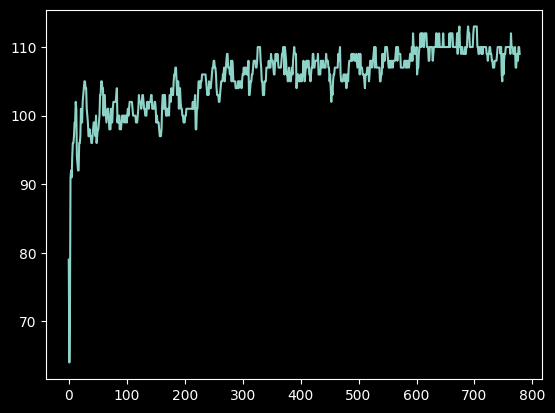

In [11]:
plt.plot(aw.hr)

aw.hr.interpolate(method='linear', order=1)

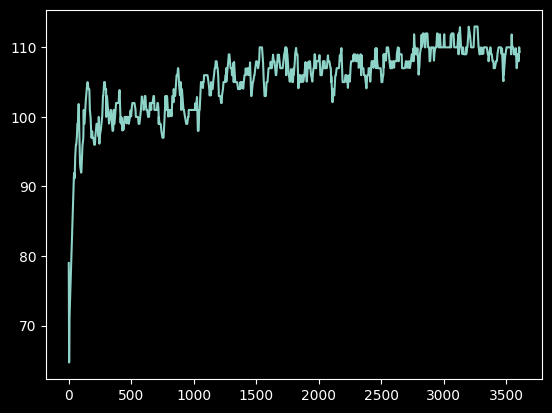

In [25]:
from scipy.interpolate import interp1d
interp = interp1d(aw.sec, aw.hr)
time = range(int(np.floor(aw.sec.iloc[-1])))
df = pd.DataFrame(data = {'time': time, 'hr': interp(time)})

df.

In [ ]:
df.to_excel("appleWatch8.xlsx")
